SECOND APRROACH
TOP_5 FEATURES


Top 5 Feature Importances:
Total_Returns: 0.4157
AgeClass_2.1: 0.2758
total_spawners_y_minus_2_to_4: 0.0577
AgeClass_1.2: 0.0302
total_spawners_y_minus_3: 0.0294


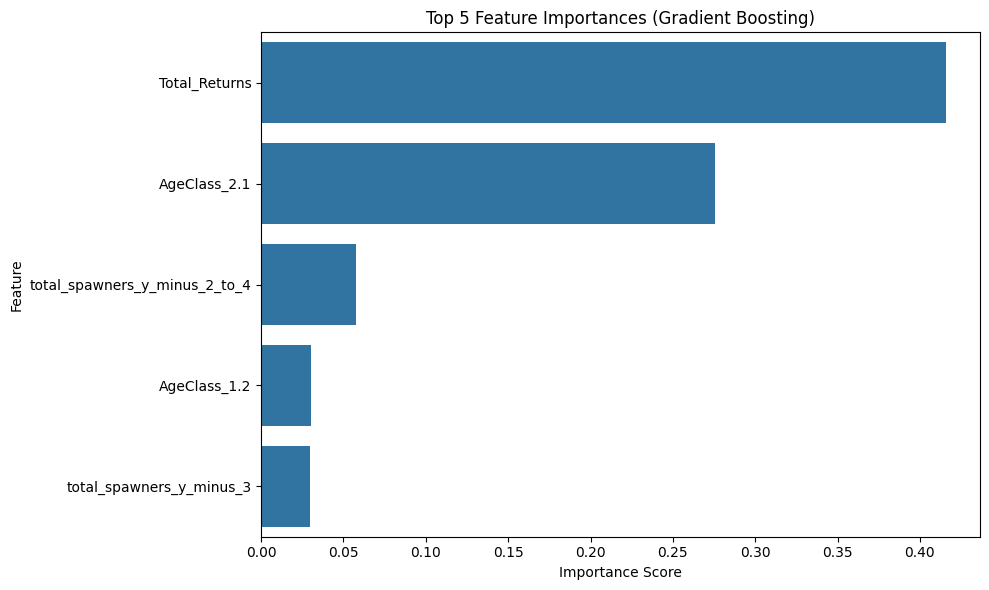

SECOND APPROACH - TOP 5 FEATURES

Gradient Boosting (Top 5 Features)
R²   (R-squared test):          -0.0280
R²   (R-squared train):         0.9906
MSE  (Mean Squared Error):      24476451038867.46
MAPE (Mean Absolute % Error):   45.45%


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
train_loaded = pd.read_csv(train_path)
test_loaded = pd.read_csv(test_path)

X_train = train_loaded.drop('Total_Returns_NextYear', axis=1)
y_train = train_loaded['Total_Returns_NextYear']
X_test = test_loaded.drop('Total_Returns_NextYear', axis=1)
y_test = test_loaded['Total_Returns_NextYear']

# Step 1: Train initial model with all features
gbr_full = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gbr_full.fit(X_train, y_train)

# Step 2: Extract top 5 features
feature_importances = pd.Series(gbr_full.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)
top_5_features = top_features.head(5).index.tolist()

# Print and plot feature importances
print("\nTop 5 Feature Importances:")
for feature in top_5_features:
    print(f"{feature}: {top_features[feature]:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.head(5).values, y=top_5_features)
plt.title("Top 5 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Step 3: Retrain using only top 5 features
X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

gbr_top5 = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
gbr_top5.fit(X_train_top5, y_train)

# Step 4: Predict and evaluate
y_pred_test = gbr_top5.predict(X_test_top5)
y_pred_train = gbr_top5.predict(X_train_top5)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
mse = mean_squared_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Final Output
print("SECOND APPROACH - TOP 5 FEATURES")
print("\nGradient Boosting (Top 5 Features)")
print(f"R²   (R-squared test):          {r2_test:.4f}")
print(f"R²   (R-squared train):         {r2_train:.4f}")
print(f"MSE  (Mean Squared Error):      {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP 5 FEATURES \n"
    "Gradient Boosting:\n"
    f"R²   (R-squared test):          {r2_test:.4f}\n"
    f"R²   (R-squared train):         {r2_train:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Polynomial transformation (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
feature_names = poly.get_feature_names_out(X_train.columns)

# 🔹 Step 2: Train full model
model_full = LinearRegression()
model_full.fit(X_train_poly, y_train)

# 🔹 Step 3: Evaluate full model
y_pred_full_test = model_full.predict(X_test_poly)
y_pred_full_train = model_full.predict(X_train_poly)

r2_test_full = r2_score(y_test, y_pred_full_test)
r2_train_full = r2_score(y_train, y_pred_full_train)
mse_full = mean_squared_error(y_test, y_pred_full_test)
mape_full = np.mean(np.abs((y_test - y_pred_full_test) / y_test)) * 100

print("\n📊 Polynomial Regression (All Features)")
print("SECOND APPROACH - TOP 5 FEATURES")
print(f"R²   (R-squared test):          {r2_test_full:.4f}")
print(f"R²   (R-squared train):         {r2_train_full:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_full:.2f}%")

# 🔹 Step 4: Top 5 polynomial features by absolute coefficient
coef_series = pd.Series(np.abs(model_full.coef_), index=feature_names)
top_5_poly_features = coef_series.sort_values(ascending=False).head(5)
print("\n🔝 Top 5 Most Influential Polynomial Features:")
print(top_5_poly_features)

# 🔹 Step 5: Filter dataset to only top 5 polynomial features
top_5_indices = [list(feature_names).index(f) for f in top_5_poly_features.index]
X_train_top5 = X_train_poly[:, top_5_indices]
X_test_top5 = X_test_poly[:, top_5_indices]

# 🔹 Step 6: Train and evaluate with top 5 features
model_top5 = LinearRegression()
model_top5.fit(X_train_top5, y_train)

y_pred_top5_test = model_top5.predict(X_test_top5)
y_pred_top5_train = model_top5.predict(X_train_top5)

r2_test_top5 = r2_score(y_test, y_pred_top5_test)
r2_train_top5 = r2_score(y_train, y_pred_top5_train)
mse_top5 = mean_squared_error(y_test, y_pred_top5_test)
mape_top5 = np.mean(np.abs((y_test - y_pred_top5_test) / y_test)) * 100

print("\n📊 Polynomial Regression (Top 5 Poly Features)")
print("SECOND APPROACH - TOP 5 FEATURES")
print(f"R²   (R-squared test):          {r2_test_top5:.4f}")
print(f"R²   (R-squared train):         {r2_train_top5:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_top5:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_top5:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  5 FEATURES \n"
    "Polynomial Regression:\n"
    f"R²   (R-squared test):          {r2_test_top5:.4f}\n"
    f"R²   (R-squared train):         {r2_train_top5:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse_top5:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape_top5:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)



📊 Polynomial Regression (All Features)
SECOND APPROACH - TOP 5 FEATURES
R²   (R-squared test):          -1162.8503
R²   (R-squared train):         1.0000
MSE  (Mean Squared Error):      27710397213480312.00
MAPE (Mean Absolute % Error):   792.85%

🔝 Top 5 Most Influential Polynomial Features:
ao_mean_DecMar total_spawners_y_minus_3    1.616260
AgeClass_1.3 River_Naknek                  1.498140
ao_mean_DecMar total_spawners_y_minus_2    1.223360
AgeClass_0.4 AgeClass_3.2                  1.208441
AgeClass_3.1 AgeClass_3.2                  0.912616
dtype: float64

📊 Polynomial Regression (Top 5 Poly Features)
SECOND APPROACH - TOP 5 FEATURES
R²   (R-squared test):          -0.3808
R²   (R-squared train):         0.1448
MSE  (Mean Squared Error):      32874858594056.36
MAPE (Mean Absolute % Error):   67.41%



📊 Linear Regression (All Features)
R²   (R-squared test):          0.1307
R²   (R-squared train):         0.6878
MSE  (Mean Squared Error):      20696362484617.75
MAPE (Mean Absolute % Error):   48.95%

🔝 Top 5 Most Influential Features:
River_Egegik: 2322567.2362
River_Igushik: -1414109.5431
River_Kvichak: 1373068.4012
River_Nushagak: -1171105.8195
River_Alagnak: -1071546.5172


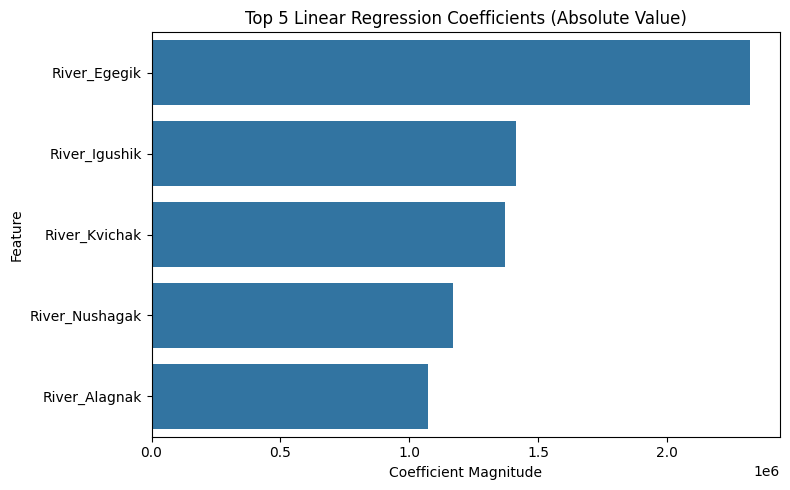


📊 Linear Regression (Top 5 Features)
SECOND APPROACH - TOP 5 FEATURES
R²   (R-squared test):          -0.1444
R²   (R-squared train):         0.4654
MSE  (Mean Squared Error):      27248076942326.55
MAPE (Mean Absolute % Error):   44.07%


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load data
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train on all features
model_full = LinearRegression()
model_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full_test = model_full.predict(X_test_full)
y_pred_full_train = model_full.predict(X_train_full)

r2_test_full = r2_score(y_test, y_pred_full_test)
r2_train_full = r2_score(y_train, y_pred_full_train)
mse_full = mean_squared_error(y_test, y_pred_full_test)
mape_full = np.mean(np.abs((y_test - y_pred_full_test) / y_test)) * 100

print("\n📊 Linear Regression (All Features)")
print(f"R²   (R-squared test):          {r2_test_full:.4f}")
print(f"R²   (R-squared train):         {r2_train_full:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_full:.2f}%")

# 🔹 Step 3: Get top 5 features by coefficient magnitude
coefs = pd.Series(model_full.coef_, index=X_train_full.columns)
top_5_features = coefs.abs().sort_values(ascending=False).head(5).index.tolist()

print("\n🔝 Top 5 Most Influential Features:")
for feature in top_5_features:
    print(f"{feature}: {coefs[feature]:.4f}")

# Optional plot
plt.figure(figsize=(8, 5))
sns.barplot(x=coefs[top_5_features].abs().values, y=top_5_features)
plt.title("Top 5 Linear Regression Coefficients (Absolute Value)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain using only top 5 features
X_train_top5 = X_train_full[top_5_features]
X_test_top5 = X_test_full[top_5_features]

model_top5 = LinearRegression()
model_top5.fit(X_train_top5, y_train)

# 🔹 Step 5: Evaluate top 5 model
y_pred_top5_test = model_top5.predict(X_test_top5)
y_pred_top5_train = model_top5.predict(X_train_top5)

r2_test_top5 = r2_score(y_test, y_pred_top5_test)
r2_train_top5 = r2_score(y_train, y_pred_top5_train)
mse_top5 = mean_squared_error(y_test, y_pred_top5_test)
mape_top5 = np.mean(np.abs((y_test - y_pred_top5_test) / y_test)) * 100

print("\n📊 Linear Regression (Top 5 Features)")
print("SECOND APPROACH - TOP 5 FEATURES")
print(f"R²   (R-squared test):          {r2_test_top5:.4f}")
print(f"R²   (R-squared train):         {r2_train_top5:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_top5:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_top5:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  5 FEATURES \n"
    "Linear Regression:\n"
    f"R²   (R-squared test):          {r2_test_top5:.4f}\n"
    f"R²   (R-squared train):         {r2_train_top5:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse_top5:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape_top5:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)



📊 Random Forest (All Features)
R²   (R-squared test):          0.3365
R²   (R-squared train):         0.9534
MSE  (Mean Squared Error):      15798473800211.39
MAPE (Mean Absolute % Error):   40.17%

🔝 Top 5 Feature Importances:
Total_Returns                    0.305940
AgeClass_2.1                     0.269707
total_spawners_y_minus_2_to_4    0.065359
AgeClass_2.2                     0.055961
total_spawners_y_minus_4         0.051027
dtype: float64


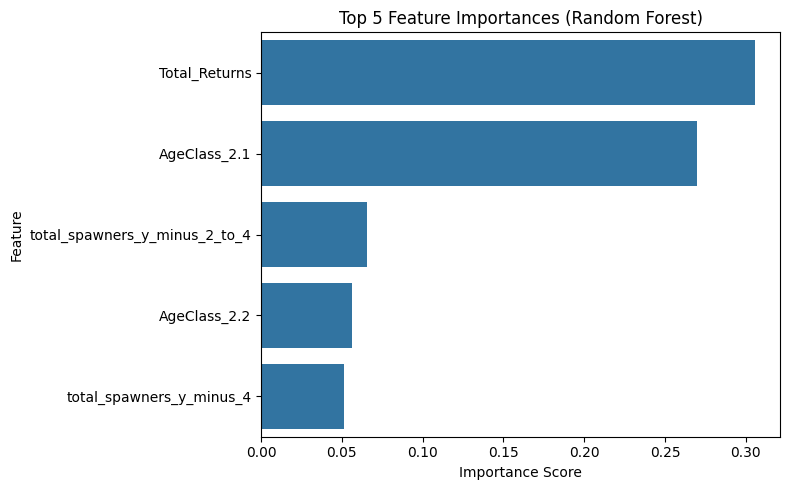


📊 Random Forest (Top 5 Features)
SECOND APPROACH - TOP 5 FEATURES
R²   (R-squared test):          0.0897
R²   (R-squared train):         0.9560
MSE  (Mean Squared Error):      21674422744206.38
MAPE (Mean Absolute % Error):   42.63%


In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train Random Forest with all features
rf_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full_test = rf_full.predict(X_test_full)
y_pred_full_train = rf_full.predict(X_train_full)

r2_test_full = r2_score(y_test, y_pred_full_test)
r2_train_full = r2_score(y_train, y_pred_full_train)
mse_full = mean_squared_error(y_test, y_pred_full_test)
mape_full = np.mean(np.abs((y_test - y_pred_full_test) / y_test)) * 100

print("\n📊 Random Forest (All Features)")
print(f"R²   (R-squared test):          {r2_test_full:.4f}")
print(f"R²   (R-squared train):         {r2_train_full:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_full:.2f}%")

# 🔹 Step 3: Top 5 most important features
feature_importances = pd.Series(rf_full.feature_importances_, index=X_train_full.columns)
top_5_features = feature_importances.sort_values(ascending=False).head(5)

print("\n🔝 Top 5 Feature Importances:")
print(top_5_features)

# Plot Top 5
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_features.values, y=top_5_features.index)
plt.title("Top 5 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain using only top 5 features
X_train_top5 = X_train_full[top_5_features.index]
X_test_top5 = X_test_full[top_5_features.index]

rf_top5 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_top5.fit(X_train_top5, y_train)

# 🔹 Step 5: Evaluate top 5 model
y_pred_top5_test = rf_top5.predict(X_test_top5)
y_pred_top5_train = rf_top5.predict(X_train_top5)

r2_test_top5 = r2_score(y_test, y_pred_top5_test)
r2_train_top5 = r2_score(y_train, y_pred_top5_train)
mse_top5 = mean_squared_error(y_test, y_pred_top5_test)
mape_top5 = np.mean(np.abs((y_test - y_pred_top5_test) / y_test)) * 100

print("\n📊 Random Forest (Top 5 Features)")
print("SECOND APPROACH - TOP 5 FEATURES")
print(f"R²   (R-squared test):          {r2_test_top5:.4f}")
print(f"R²   (R-squared train):         {r2_train_top5:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_top5:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_top5:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  5 FEATURES \n"
    "Random Forest:\n"
    f"R²   (R-squared test):          {r2_test_top5:.4f}\n"
    f"R²   (R-squared train):         {r2_train_top5:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse_top5:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape_top5:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)



📊 XGBoost (All Features)
R²   (R-squared test):          -0.0373
R²   (R-squared train):         1.0000
MSE  (Mean Squared Error):      24696531534541.34
MAPE (Mean Absolute % Error):   48.36%

🔝 Top 5 Feature Importances:
AgeClass_2.1                     0.321799
Total_Returns                    0.179241
total_spawners_y_minus_2_to_4    0.095772
sst_aprjul                       0.061558
total_spawners_y_minus_2         0.052664
dtype: float32


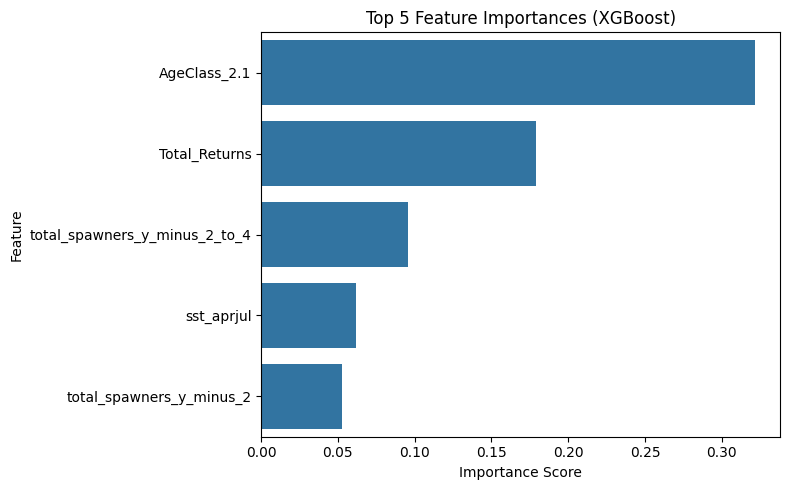


📊 XGBoost (Top 5 Features)
SECOND APPROACH - TOP 5 FEATURES
R²   (R-squared test):          -0.1685
R²   (R-squared train):         1.0000
MSE  (Mean Squared Error):      27820276133929.20
MAPE (Mean Absolute % Error):   54.77%


In [5]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# File paths — using full feature set
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\SECOND_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train_full = df_train.drop('Total_Returns_NextYear', axis=1)
y_train = df_train['Total_Returns_NextYear']
X_test_full = df_test.drop('Total_Returns_NextYear', axis=1)
y_test = df_test['Total_Returns_NextYear']

# 🔹 Step 1: Train on all features
xgb_full = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_full.fit(X_train_full, y_train)

# 🔹 Step 2: Evaluate full model
y_pred_full_test = xgb_full.predict(X_test_full)
y_pred_full_train = xgb_full.predict(X_train_full)

r2_test_full = r2_score(y_test, y_pred_full_test)
r2_train_full = r2_score(y_train, y_pred_full_train)
mse_full = mean_squared_error(y_test, y_pred_full_test)
mape_full = np.mean(np.abs((y_test - y_pred_full_test) / y_test)) * 100

print("\n📊 XGBoost (All Features)")
print(f"R²   (R-squared test):          {r2_test_full:.4f}")
print(f"R²   (R-squared train):         {r2_train_full:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_full:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_full:.2f}%")

# 🔹 Step 3: Get top 5 features
feature_importances = pd.Series(xgb_full.feature_importances_, index=X_train_full.columns)
top_5_features = feature_importances.sort_values(ascending=False).head(5)

print("\n🔝 Top 5 Feature Importances:")
print(top_5_features)

# Plot top 5
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_features.values, y=top_5_features.index)
plt.title("Top 5 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 🔹 Step 4: Retrain using top 5 features
X_train_top5 = X_train_full[top_5_features.index]
X_test_top5 = X_test_full[top_5_features.index]

xgb_top5 = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_top5.fit(X_train_top5, y_train)

# 🔹 Step 5: Evaluate top 5 model
y_pred_top5_test = xgb_top5.predict(X_test_top5)
y_pred_top5_train = xgb_top5.predict(X_train_top5)

r2_test_top5 = r2_score(y_test, y_pred_top5_test)
r2_train_top5 = r2_score(y_train, y_pred_top5_train)
mse_top5 = mean_squared_error(y_test, y_pred_top5_test)
mape_top5 = np.mean(np.abs((y_test - y_pred_top5_test) / y_test)) * 100

print("\n📊 XGBoost (Top 5 Features)")
print("SECOND APPROACH - TOP 5 FEATURES")
print(f"R²   (R-squared test):          {r2_test_top5:.4f}")
print(f"R²   (R-squared train):         {r2_train_top5:.4f}")
print(f"MSE  (Mean Squared Error):      {mse_top5:.2f}")
print(f"MAPE (Mean Absolute % Error):   {mape_top5:.2f}%")

# Define result string
result_str = (
    "\n\n===============================\n"
    "SECOND APPROACH - TOP  5 FEATURES \n"
    "XGBoost:\n"
    f"R²   (R-squared test):          {r2_test_top5:.4f}\n"
    f"R²   (R-squared train):         {r2_train_top5:.4f}\n"
    f"MSE  (Mean Squared Error):      {mse_top5:.2f}\n"
    f"MAPE (Mean Absolute % Error):   {mape_top5:.2f}%\n"
)

# Path to results file
results_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\results.txt"

# Append to file
with open(results_path, "a", encoding="utf-8") as f:
    f.write(result_str)
